In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Nov  6 2022 20:23:54

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
N = 1000           # number of neurons
T = 600            # simulation time (ms)

In [3]:
neurons = nest.Create('iaf_psc_alpha', N)
noise_ex = nest.Create('poisson_generator', N)
noise_in = nest.Create('poisson_generator', N)
noise_ex.set(rate=75000.0)
noise_in.set(rate=16000.0)

sr = nest.Create('spike_recorder')

In [4]:
# Connect poisson spike trains to neurons
syn_dict_ex = {'weight': 1.2}
syn_dict_in = {'weight': -2.0}
nest.Connect(noise_ex, neurons, conn_spec='one_to_one', syn_spec=syn_dict_ex)
nest.Connect(noise_in, neurons, conn_spec='one_to_one', syn_spec=syn_dict_in)

nest.Connect(neurons, sr)

In [5]:
# Simulate for 1000 ms
nest.Simulate(T)


Jan 31 13:31:49 NodeManager::prepare_nodes [Info]: 
    Preparing 3001 nodes for simulation.

Jan 31 13:31:49 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3001
    Simulation time (ms): 600
    Number of OpenMP threads: 1
    Not using MPI

Jan 31 13:31:50 SimulationManager::run [Info]: 
    Simulation finished.


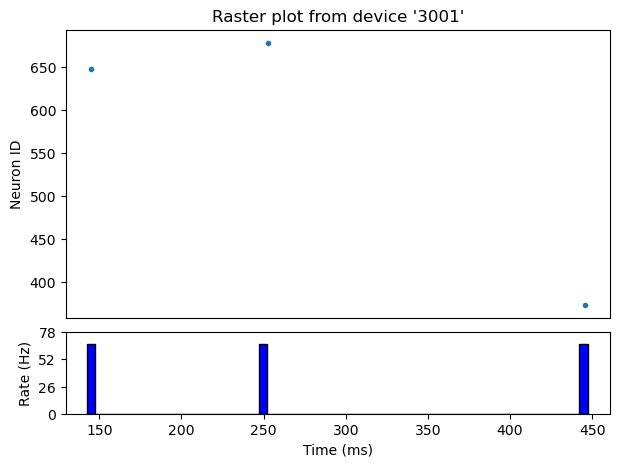

In [6]:
nest.raster_plot.from_device(sr, hist=True)
plt.show()